# CLASSIFICATION

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import graphlab
import seaborn  as sns

In [3]:
#se non hai seaborn installato
#! pip install --user seaborn


### Acquisizione dei dati

In [6]:
train_df = pd.read_csv('Classification/data/train.csv')
test_df = pd.read_csv('Classification/data/test.csv')
combine = [train_df, test_df]

In [7]:
len(train_df)+ len(test_df) #numero di osservazioni

1309

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#include le stringhe
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Visualizzazione dei dati

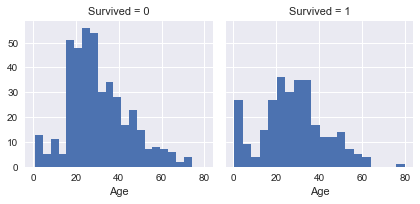

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

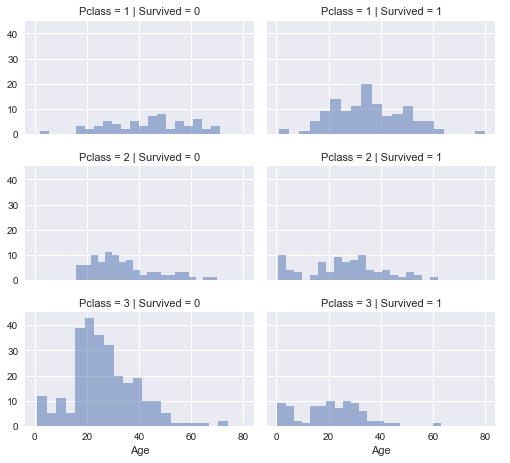

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

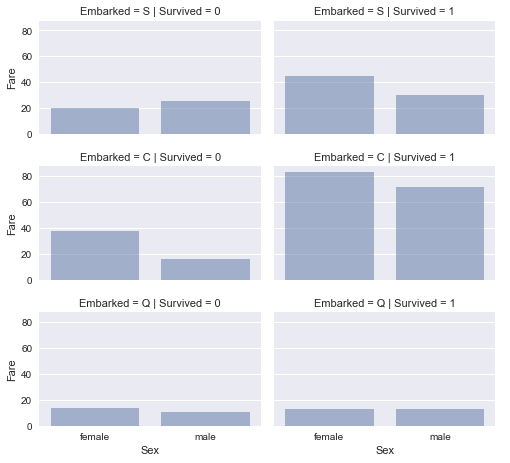

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
train_df['Has_Cabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['Has_Cabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [21]:
train_df[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


In [22]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [23]:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

In [24]:
train_df[["IsAlone", "Survived"]].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1,1


### Sostituiamo con il piu' frequente

In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [27]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
test_df['Embarked'] = test_df['Embarked'].fillna(freq_port)

### Contiamo i missing values per Age

In [29]:
age_null_count = train_df['Age'].isnull().sum()
age_null_count


177

### C'e' una correlazione tra Age, Gender, and Pclass

In [30]:
len(train_df)

891

In [33]:
# elimino i valori nulli

train_df = train_df[train_df['Age'].notnull()]
test_df = test_df[test_df['Age'].notnull()]


In [34]:
    
    train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0

    train_df.loc[ train_df['Age'] > 16, 'Age'] =1
    


/Users/Administrator/anaconda/envs/gl-env/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [139]:
    
    test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0

    test_df.loc[ test_df['Age'] > 16, 'Age'] =1

In [140]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,8.0500,NaN,S,0,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,1.0,0,0,17463,51.8625,E46,S,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,0,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,S,0,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,0,2,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,0.0,1,1,PP 9549,16.7000,G6,S,1,3,0


In [141]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,1.0,0,0,330911,7.8292,NaN,Q,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.0,1,0,363272,7.0000,NaN,S,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,9.6875,NaN,Q,0,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,NaN,S,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,0,3,0
5,897,3,"Svensson, Mr. Johan Cervin",0,0.0,0,0,7538,9.2250,NaN,S,0,1,1
6,898,3,"Connolly, Miss. Kate",1,1.0,0,0,330972,7.6292,NaN,Q,0,1,1
7,899,2,"Caldwell, Mr. Albert Francis",0,1.0,1,1,248738,29.0000,NaN,S,0,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1.0,0,0,2657,7.2292,NaN,C,0,1,1
9,901,3,"Davies, Mr. John Samuel",0,1.0,2,0,A/4 48871,24.1500,NaN,S,0,3,0


In [146]:
df_embarked =pd.get_dummies(train_df["Embarked"])
df_Pclass =pd.get_dummies(train_df["Pclass"])

In [148]:
test_df_embarked =pd.get_dummies(test_df["Embarked"])
test_df_Pclass =pd.get_dummies(test_df["Pclass"])

In [149]:
df_embarked

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0
10,0.0,0.0,1.0


In [151]:
test_df =pd.concat([test_df, test_df_embarked], axis=1)
test_df =pd.concat([test_df, test_df_Pclass], axis=1)

In [152]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone,C,Q,S,1,2,3
0,892,3,"Kelly, Mr. James",0,1.0,0,0,330911,7.8292,NaN,Q,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.0,1,0,363272,7.0000,NaN,S,0,2,0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,9.6875,NaN,Q,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,NaN,S,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0
5,897,3,"Svensson, Mr. Johan Cervin",0,0.0,0,0,7538,9.2250,NaN,S,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0
6,898,3,"Connolly, Miss. Kate",1,1.0,0,0,330972,7.6292,NaN,Q,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0
7,899,2,"Caldwell, Mr. Albert Francis",0,1.0,1,1,248738,29.0000,NaN,S,0,3,0,0.0,0.0,1.0,0.0,1.0,0.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1.0,0,0,2657,7.2292,NaN,C,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0
9,901,3,"Davies, Mr. John Samuel",0,1.0,2,0,A/4 48871,24.1500,NaN,S,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0


In [150]:
train_df =pd.concat([train_df, df_Pclass], axis=1)
train_df =pd.concat([train_df, df_embarked], axis=1)



In [153]:
train_df['Ticket'] = train_df['Ticket'].astype('|S') 
train_df['Name'] = train_df['Name'].astype('|S') 
train_df['Cabin'] = train_df['Cabin'].astype('|S') 
train_df['Embarked'] = train_df['Embarked'].astype('|S') 

test_df['Ticket'] = test_df['Ticket'].astype('|S') 
test_df['Name'] = test_df['Name'].astype('|S') 
test_df['Cabin'] = test_df['Cabin'].astype('|S') 
test_df['Embarked'] = test_df['Embarked'].astype('|S') 




In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null object
Has_Cabin      714 non-null int64
FamilySize     714 non-null int64
IsAlone        714 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 89.2+ KB


In [154]:
#Trasforma i dataframe train_df e test_df in SFrame
from graphlab import SFrame
train_sf = SFrame(data=train_df)
test_sf = SFrame(data=test_df)



In [196]:
train_sf.save("train_sf.csv")
test_sf.save("test_sf.csv")

In [173]:
test_sf

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",0,1.0,0,0,330911,7.8292,nan,Q
893,3,"Wilkes, Mrs. James (EllenNeeds) ...",1,1.0,1,0,363272,7.0,nan,S
894,2,"Myles, Mr. Thomas Francis",0,1.0,0,0,240276,9.6875,nan,Q
895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,nan,S
896,3,"Hirvonen, Mrs. Alexander(Helga E Lindqvist) ...",1,1.0,1,1,3101298,12.2875,nan,S
897,3,"Svensson, Mr. JohanCervin ...",0,0.0,0,0,7538,9.225,nan,S
898,3,"Connolly, Miss. Kate",1,1.0,0,0,330972,7.6292,nan,Q
899,2,"Caldwell, Mr. AlbertFrancis ...",0,1.0,1,1,248738,29.0,nan,S
900,3,"Abrahim, Mrs. Joseph(Sophie Halaut Easu) ...",1,1.0,0,0,2657,7.2292,nan,C
901,3,"Davies, Mr. John Samuel",0,1.0,2,0,A/4 48871,24.15,nan,S


In [157]:
train_sf

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171
2,1,1,"Cumings, Mrs. JohnBradley (Florence Briggs ...",1,1.0,1,0,PC 17599
3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282
4,1,1,"Futrelle, Mrs. JacquesHeath (Lily May Peel) ...",1,1.0,1,0,113803
5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450
7,0,1,"McCarthy, Mr. Timothy J",0,1.0,0,0,17463
8,0,3,"Palsson, Master. GostaLeonard ...",0,0.0,3,1,349909
9,1,3,"Johnson, Mrs. Oscar W(Elisabeth Vilhelmina ...",1,1.0,0,2,347742
10,1,2,"Nasser, Mrs. Nicholas(Adele Achem) ...",1,0.0,1,0,237736
11,1,3,"Sandstrom, Miss.Marguerite Rut ...",1,0.0,1,1,PP 9549


In [164]:
decision_tree_classifier = graphlab.decision_tree_classifier.create(train_sf, target="Survived", 
                                                                    features =["Pclass","Sex","Age","Embarked","Has_Cabin","IsAlone"],
                                                                     validation_set=None)

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 714

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002768     | 0.829132          | 0.570506          |

+-----------+--------------+-------------------+-------------------+

In [165]:
boosted_tree_classifier = graphlab.boosted_trees_classifier.create(train_sf, target="Survived", 
                                                                    features =["Pclass","Sex","Age","Embarked","Has_Cabin","IsAlone"],
                                                                     validation_set=None)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 714

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.002767     | 0.829132          | 0.570506          |

| 2         | 0.005482     | 0.829132          | 0.503483          |

| 3         | 0.008937     | 0.829132          | 0.463316          |

| 4         | 0.011536     | 0.829132          | 0.438405          |

| 5         | 0.014403     | 0.829132          | 0.422843          |

| 6         | 0.017139     | 0.829132          | 0.412349          |

+-----------+--------------+-------------------+-------------------+

In [166]:
logistic_classifier = graphlab.logistic_classifier.create(train_sf, target="Survived", 
                                                                    features =["Pclass","Sex","Age","Embarked","Has_Cabin","IsAlone"],
                                                                     validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 714

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients    : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.003909     | 0.787115          |

| 2         | 3        | 0.006919     | 0.788515          |

| 3         | 4        | 0.009048     | 0.801120          |

| 4         | 5        | 0.011360     | 0.801120          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [168]:
svm_classifier = graphlab.svm_classifier.create(train_sf, target="Survived", 
                                                                    features =["Pclass","Sex","Age","Embarked","Has_Cabin","IsAlone"],
                                                                     validation_set=None,max_iterations=50)

SVM:

--------------------------------------------------------

Number of examples          : 714

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients    : 8

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 1         | 3        | 0.001401  | 0.001326     | 0.707283          |

| 2         | 5        | 1.000000  | 0.002941     | 0.773109          |

| 3         | 6        | 1.000000  | 0.003865     | 0.778711          |

| 4         | 7        | 1.000000  | 0.004746     | 0.780112          |

| 5         | 9        | 1.000000  | 0.006244     | 0.781513          |

| 6         | 10       | 1.000000  | 0.007413     | 0.780112          |

| 11        | 16       | 1.000000  | 0.013106     | 0.780112          |

+-----------+----------+-----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [213]:
def get_accuracy(model,data,true_labels):
    predictions =model.predict(data)
    num_correct =sum(predictions==true_labels)
    accuracy = num_correct*1.0/len(data)

    return accuracy

In [214]:
d_treesAcc= get_accuracy(decision_tree_classifier,train_sf, train_sf["Survived"])
svmAcc= get_accuracy(svm_classifier,train_sf, train_sf["Survived"])
logClassAcc= get_accuracy(logistic_classifier,train_sf, train_sf["Survived"])
boostAcc= get_accuracy(boosted_tree_classifier,train_sf, train_sf["Survived"])





In [188]:
logClassAcc

0.8011204481792717

In [190]:
svmAcc

0.7801120448179272

In [191]:
d_treesAcc

0.8291316526610645

In [192]:
boostAcc

0.8291316526610645

In [ ]:
#CHALLENGE!!